<a href="https://colab.research.google.com/github/majidshaik/Data-Science-Learning/blob/master/src/ML/LinearRegression/DSL_Lesson_7_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regression Overview**
As we saw in the last lesson, regression is simply the process of trying to create a "best fit" line through a set of data.  This line is then used as a predictor for new data (you just find the corresponding point on the line to predict the dependent variable's value based on one or more indedepentent variables.  The *line* of a regression may not actually be a straight line, depending on the regression model you use, which should be carefully chosen to reflect the distribution of the data (usually visualized with a scatter plot).



##**Linear Regression**##
The simplest kind of regression is a *Simple Linear Regression* with one independent and one dependent variable.  The regression line calculated by this model is really just made up of the sum to squared differences of each point from the average: [Here's a way to do it manually in excel.](http://www.learnbymarketing.com/tutorials/linear-regression-by-hand-in-excel/#:~:text=Simple%20Linear%20Regression%20Math%20by%20Hand&text=Calculate%20the%20difference%20between%20each,average%20of%20your%20Y%20variable.)

> Just as in any line the formula is y = mx + b.  (If x = 0, we will find the y intercept, which is b.  m is the slope (*rise over run* = how much y increases or decreases based on x).  

![alt text](https://files.realpython.com/media/fig-lin-reg.a506035b654a.png)


Let's see how easy it is to do in python:

In [ ]:
import seaborn as sns
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
sns.get_dataset_names()

/usr/local/lib/python3.6/dist-packages/seaborn/utils.py:384: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 384 of the file /usr/local/lib/python3.6/dist-packages/seaborn/utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [ ]:
sns.load_dataset('mpg')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


Here we can see we have a few scalar variables we might want to explore using linear regressions.  We can try to predict acceleration using the horsepowewr or weight of the vehicle, or see if we can predict miles per gallon based on hosepower and acceleration.

Let's start with a simple linear regression to predict acceleration based on weight as see how it goes.



In [ ]:
mpg_dataset = sns.load_dataset('mpg')

In [ ]:
x = mpg_dataset['weight']
y = mpg_dataset['acceleration']

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [ ]:
model.fit(x,y)

ValueError: ignored

In [ ]:
x = mpg_dataset[['weight']]
# It turns out for some reason one of the variables has to be two-dimensional for this function to work...

In [ ]:
print(x)

     weight
0      3504
1      3693
2      3436
3      3433
4      3449
..      ...
393    2790
394    2130
395    2295
396    2625
397    2720

[398 rows x 1 columns]


In [ ]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Ok now we've "fit" the model, meaning it already did the work of calculating the sum of squares for x and y and determining the slope and y-intercept.  Now we need to get the coefficient of determination (𝑅²) value to find out how well the model fit the data.  *This is actually Pearson's R... It's the correlation between the predicted values (along the line) and the actual values from the data points.* 
> In stats we use square the R for any correlation to try to answer the question of how well x can predict y, or more specifically: **"What percentage of the variance in y can be explained by x?"**  (As you can imagine, this is a very practical question in data science).

In [ ]:
model_r_squared = model.score(x,y)
print (model_r_squared)

0.1742706139718161


Ooook so this tells us we didn't do so well actually... Only 17% of the value of y is explained by x.  There are clearly other important factors at play.

Imagining we did do well, if we wanted to find out the y-intercept and slope of the line, we can use:

In [ ]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 19.606158370537578
slope: [-0.00135942]


This tells us that if the weight were zero (impossible anyways) that the acceleration (based on this simple linear model) would be 19.6 and that as weight increases, the acceleration decreases by .0014 per unit of x.

Since the model didn't do so well, maybe we should try a multilinear regression before making any predictions:

##**Multiple Linear Regression**
Here is the same as above with a line except the x variable will now have two columns (two different x's to work with).  Also so you understand, here's the formula:

![alt text](https://drive.google.com/uc?id=1K3qomnWnF0ylOWcmaJLlA4MCQSvxrclH)

> *Each of the values we were considering to be "slope" can also be considered "weights" for how much each x affects y.*

In terms of python, it's simple to implement:



In [ ]:
# Let's create a model to predict acceleration based on weight and horsepower.
# We just need to add a column to x:

x['horsepower'] = mpg_dataset['horsepower'].copy()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
print(type(x))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
print(x)

     weight  horsepower
0      3504       130.0
1      3693       165.0
2      3436       150.0
3      3433       150.0
4      3449       140.0
..      ...         ...
393    2790        86.0
394    2130        52.0
395    2295        84.0
396    2625        79.0
397    2720        82.0

[398 rows x 2 columns]


In [ ]:
model_weight_hp = LinearRegression().fit(x,y)

ValueError: ignored

In [ ]:
# We didn't clean the data... lets see...

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   weight      398 non-null    int64  
 1   horsepower  392 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 6.3 KB


In [ ]:
x.describe()

,weight,horsepower
count,398.000000,392.000000
mean,2970.424623,104.469388
std,846.841774,38.491160
min,1613.000000,46.000000
25%,2223.750000,75.000000
50%,2803.500000,93.500000
75%,3608.000000,126.000000
max,5140.000000,230.000000


In [ ]:
x.count()

weight        398
horsepower    392
dtype: int64

In [ ]:
mpg_dataset.dropna(inplace=True)

In [ ]:
mpg_dataset.count()

mpg             392
cylinders       392
displacement    392
horsepower      392
weight          392
acceleration    392
model_year      392
origin          392
name            392
dtype: int64

In [ ]:
model_weight_hp = LinearRegression().fit(x,y)

ValueError: ignored

In [ ]:
y = mpg_dataset['acceleration']
y.count()

392

In [ ]:
x.count()

weight        398
horsepower    392
dtype: int64

In [ ]:
x.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
model_weight_hp = LinearRegression().fit(x,y)

In [ ]:
# Ok it worked...  Let's check the R-squared to see if it worked any better.

In [ ]:
model_r_squared = model_weight_hp.score(x,y)
print(model_r_squared)

0.6018428629812774


In [ ]:
# Much much better!  Let's check out the intercept and slope.
print('intercept:', model_weight_hp.intercept_)
print('slope:', model_weight_hp.coef_)

intercept: 18.435791163416614
slope: [ 0.00230182 -0.09331277]


In [ ]:
# As you can see we now have two "slopes" for the two different x variables.
# The weight one is going in the opposite direction as expected and is very low,
# indicating it's probably garbage...  We could take it out and see optionally but
# let's continue to learn python.

Great, now we can see what those predicted values for acceleration were:

In [ ]:
y_pred = model_weight_hp.predict(x)
print('predicted accelerations:', y_pred, sep='\n')

predicted accelerations:
[14.37070896 11.53980616 12.3479299  12.34102444 13.31098121  9.95206427
  7.92910709  8.29899448  7.62597249  9.56837277 10.77400573 11.8130171
 13.09602139  4.54383552 15.0309955  16.09213452 15.76970161 16.45901445
 15.12714442 18.36724366 16.46804362 15.63106489 15.03790096 13.03371457
 16.13286165  8.99644594  9.84600244  8.92668571 11.31863971 15.12714442
 15.24896277 14.69953343 15.16750852 16.55390979 16.76727341 17.82487745
 16.67289879 12.72754528 12.38138172 13.72069836 13.86713109 13.04501151
 13.49705879 13.93741204 14.98937782 17.26005462 16.65908787 17.44968079
 15.52093375 14.92440615 16.67787227 16.0972793  16.45158828 15.71004602
 17.05856313 16.40395569 14.81462442 15.86443926 18.58520411 15.58042485
 15.53474467 12.87716358 12.19953794 13.95690207 13.66315286 12.89115942
  9.69106805 14.33510618 13.76265864 10.88501381 14.74769353 13.39755981
 15.73799003 15.2560191  13.82339651 14.73599951 17.12389102 17.17470236
 17.03589434 15.92375225 15

Just so you know, you normally would apply the prediction to new data... But yeah it's the same process.  (We should have split the data in half to begin with but I was running out of time).

##**Alternate Method: Using *statsmodels***
There's another easily accessible module to do this that will give you more detailed data if desired:

In [ ]:
import statsmodels.api as sm

In [ ]:
# For some reason statsmodels requires you to add a column of 1's to be able to
# calculate the y-intercept... That's a little straight but perhaps it has to
# to with weights?

x = sm.add_constant(x)

In [ ]:
print(x)

     const  weight  horsepower
0      1.0    3504       130.0
1      1.0    3693       165.0
2      1.0    3436       150.0
3      1.0    3433       150.0
4      1.0    3449       140.0
..     ...     ...         ...
393    1.0    2790        86.0
394    1.0    2130        52.0
395    1.0    2295        84.0
396    1.0    2625        79.0
397    1.0    2720        82.0

[392 rows x 3 columns]


In [ ]:
new_model = sm.OLS(y, x)

In [ ]:
results = new_model.fit()

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           acceleration   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     294.0
Date:                Sat, 08 Aug 2020   Prob (F-statistic):           1.62e-78
Time:                        15:43:21   Log-Likelihood:                -773.03
No. Observations:                 392   AIC:                             1552.
Df Residuals:                     389   BIC:                             1564.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.4358      0.326     56.467      0.0

In [ ]:
sns.set()

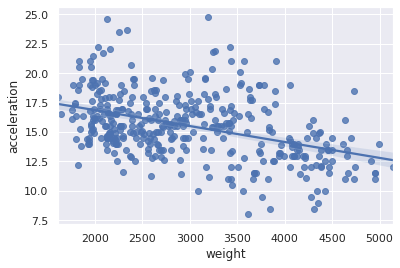

In [ ]:
sns.regplot(x='weight',y='acceleration',data=mpg_dataset)

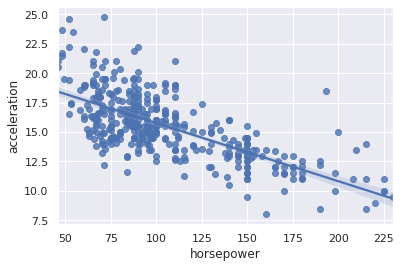

In [ ]:
sns.regplot(x='horsepower',y='acceleration',data=mpg_dataset)

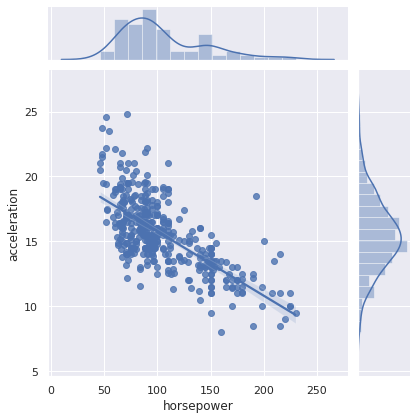

In [ ]:
sns.jointplot(x="horsepower", y="acceleration", data=mpg_dataset, kind="reg")

#**Real Example**
Well I realized that in the above example we had a negative correlation with horsepower and acceleration... 

When I saw the significant relationship, I naiively assumed the relationship was in the appropriate direction.  Not sure that is wrong with the dataset (or perhaps I don't know enough about cars). 


Let's move onto one that definitely makes sense:

## **Real Estate Example**
Let's bring in a real estate dataset again to see if we can find an expected correlation: the association between a property's square feet (size) and its list price (the price they initially try to sell it for):

In [ ]:
RE_data = pd.read_csv("/content/sample_data/Germantown Sales.csv")

In [ ]:
RE_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MLS #                      3114 non-null   int64  
 1   Pics                       3114 non-null   object 
 2   Status                     3114 non-null   object 
 3   Area                       3114 non-null   object 
 4   Address                    3114 non-null   object 
 5   City                       3114 non-null   object 
 6   Zip                        3114 non-null   object 
 7   Unit #                     219 non-null    float64
 8   ListPrice                  3114 non-null   object 
 9   SalePrice                  3114 non-null   object 
 10  List Agent - Agent Name    3114 non-null   object 
 11  List Office - Office Code  3114 non-null   object 
 12  Sold Square Feet           3114 non-null   int64  
 13  Sale Price Per SqFt        3107 non-null   float

The two variables we're interested in are *ListPrice* and *Sold Square Feet*.  Both have 3114 values so no NA's.  But ListPrice isn't treated as a float... Let's check it out.

In [ ]:
RE_data['ListPrice'].describe()

count         3114
unique         764
top       $299,900
freq            56
Name: ListPrice, dtype: object

In [ ]:
RE_data['ListPrice']

0          $66,900
1         $114,900
2          $82,600
3          $82,013
4         $109,900
           ...    
3109    $1,495,000
3110    $1,295,000
3111    $1,649,000
3112    $2,050,000
3113    $2,195,000
Name: ListPrice, Length: 3114, dtype: object

OK we can see that the $ and commas are probably messing with the conversion.  Can we convert automatically to float?

In [ ]:
float_test = float(RE_data['ListPrice'][1])

ValueError: ignored

Ok so just trying a test value from the list we see that we can't convert directly.

In [ ]:
RE_data['ListPrice'] = RE_data['ListPrice'].str.replace('$','')

In [ ]:
RE_data['ListPrice']

0          66,900
1         114,900
2          82,600
3          82,013
4         109,900
          ...    
3109    1,495,000
3110    1,295,000
3111    1,649,000
3112    2,050,000
3113    2,195,000
Name: ListPrice, Length: 3114, dtype: object

In [ ]:
RE_data['ListPrice'] = RE_data['ListPrice'].str.replace(',','')

In [ ]:
RE_data['ListPrice']

0         66900
1        114900
2         82600
3         82013
4        109900
         ...   
3109    1495000
3110    1295000
3111    1649000
3112    2050000
3113    2195000
Name: ListPrice, Length: 3114, dtype: object

In [ ]:
RE_data['ListPrice'] = RE_data['ListPrice'].astype(float)

In [ ]:
RE_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MLS #                      3114 non-null   int64  
 1   Pics                       3114 non-null   object 
 2   Status                     3114 non-null   object 
 3   Area                       3114 non-null   object 
 4   Address                    3114 non-null   object 
 5   City                       3114 non-null   object 
 6   Zip                        3114 non-null   object 
 7   Unit #                     219 non-null    float64
 8   ListPrice                  3114 non-null   float64
 9   SalePrice                  3114 non-null   object 
 10  List Agent - Agent Name    3114 non-null   object 
 11  List Office - Office Code  3114 non-null   object 
 12  Sold Square Feet           3114 non-null   int64  
 13  Sale Price Per SqFt        3107 non-null   float

In [ ]:
#ok ready to go!

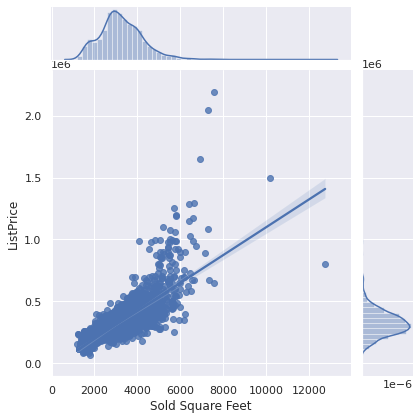

In [ ]:
sns.jointplot(x="Sold Square Feet", y="ListPrice", data=RE_data, kind="reg")

In [ ]:
#MUUUUUCH better! We see that we have some outliers though (maybe for this example
# we can ignore them?)  And we have strange values for ListPrice (weird scale)...

In [ ]:
RE_data['ListPrice'].describe()

count    3.114000e+03
mean     3.382346e+05
std      1.431119e+05
min      6.690000e+04
25%      2.590000e+05
50%      3.197000e+05
75%      3.899000e+05
max      2.195000e+06
Name: ListPrice, dtype: float64

In [ ]:
# Ok I guess it was just writing it in scientific notation

In [ ]:
x1 = RE_data['Sold Square Feet']
y1 = RE_data['ListPrice']

In [ ]:
x1 = sm.add_constant(x1)
RE_model = sm.OLS(y1, x1)
results1 = RE_model.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:              ListPrice   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     4976.
Date:                Sat, 08 Aug 2020   Prob (F-statistic):               0.00
Time:                        16:06:52   Log-Likelihood:                -39899.
No. Observations:                3114   AIC:                         7.980e+04
Df Residuals:                    3112   BIC:                         7.981e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2.852e+04   5437.436  

The coefficient is 112, meaning for every sqft of the property, the price will be $112.82 higher.  

However the R-squared in the model is only 0.615 so there's still room for improvement.

# **Generalized Linear Regression**

https://www.statsmodels.org/devel/examples/notebooks/generated/glm.html

# **Nonlinear Regression Models**

## **Polynomial Regression**
https://www.w3schools.com/python/python_ml_polynomial_regression.asp

##**Decision Tree Regressor**

https://saedsayad.com/decision_tree_reg.htm

https://www.pluralsight.com/guides/non-linear-regression-trees-scikit-learn


https://explained.ai/decision-tree-viz/
